In [ ]:
#Optimal TPOT Run 

#Imports

In [ ]:
#Importing Packages 
import numpy as np
import pandas as pd
import sklearn
#import tpot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import csv
import platform
#from tpot import TPOTClassifier
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
#Checking Package version numbers 
print("Current Software Versions used:")
print("Python Version:" +platform.python_version())
print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)
print("Sklearn Version: "+ sklearn.__version__)
#print("TPOT Version: " + tpot.__version__)

Current Software Versions used:
Python Version:3.7.13
Pandas Version: 1.3.5
Numpy Version: 1.21.6
Sklearn Version: 1.0.2


In [ ]:
print("This model was intially coded using the following  versions:")
print("Python Version:3.7.6")
print("Pandas Version: 1.0.1")
print("Numpy Version: 1.18.1")
print("Sklearn Version: 0.22.1")
print("TPOT Version: 0.9.5")
print("If the versions being used are different please ensure that version used is combatible.")


This model was intially coded using the following  versions:
Python Version:3.7.6
Pandas Version: 1.0.1
Numpy Version: 1.18.1
Sklearn Version: 0.22.1
TPOT Version: 0.9.5
If the versions being used are different please ensure that version used is combatible.


#Dataset & Preprocessing

In [ ]:
#Import Dataset
Dataset = pd.read_csv('/content/drive/MyDrive/CEADS Project Stuff/Datasets Models/GPWRCompleteDatasetwithTransient2.csv', header=None)

In [ ]:
#Checking Contents
print(Dataset.head())
print(Dataset.info())
print(Dataset.describe())

   0        1    2    3        4        5        6        7        8   \
0  20  25.0013  2.4  4.5  578.103  562.396  562.396  578.187  562.404   
1  21  24.9863  2.4  4.5  578.096  562.398  562.398  578.187  562.405   
2  22  24.9727  2.4  4.5  578.094  562.399  562.399  578.189  562.406   
3  23  24.9644  2.4  4.5  578.096  562.400  562.400  578.191  562.407   
4  24  24.9562  2.4  4.5  578.095  562.401  562.401  578.190  562.407   

        9   ...       26       27       28       29       30       31  \
0  562.404  ...  1097.22  1097.23  570.272  2242.58  34.5050  653.191   
1  562.405  ...  1097.25  1097.25  570.272  2242.12  34.4791  653.162   
2  562.406  ...  1097.27  1097.27  570.272  2241.15  34.4571  653.100   
3  562.407  ...  1097.29  1097.29  570.273  2239.57  34.4317  653.000   
4  562.407  ...  1097.31  1097.31  570.273  2237.37  34.4016  652.859   

        32       33   34                            35  
0  653.191  272.320  BOL  Transient- Depressurization   
1  653.1

In [ ]:
#From Exploration above it is confirmed that there are no missing values.
#All columns have been casted to the correct type 
#Any consistent columns will be removed 
#For model creatation the columns with time, normalized flux, noramllized flow, normalized SG Level and normalized pressure 
#will be dropped. Time is irrevlant as a feature for this analysis and the normalized values are redundant as the data contains
#the actual values for these features 

In [ ]:
#Removing unneeded columns
Analysis_Dataset=Dataset.drop([1,10,11,12,13,18,20,30], axis=1)

In [ ]:
#Checking contents of new dataframe 
Analysis_Dataset.head()

0    2    3        4        5        6        7        8        9   \
0  20  2.4  4.5  578.103  562.396  562.396  578.187  562.404  562.404   
1  21  2.4  4.5  578.096  562.398  562.398  578.187  562.405  562.405   
2  22  2.4  4.5  578.094  562.399  562.399  578.189  562.406  562.406   
3  23  2.4  4.5  578.096  562.400  562.400  578.191  562.407  562.407   
4  24  2.4  4.5  578.095  562.401  562.401  578.190  562.407  562.407   

        14  ...       25       26       27       28       29       31  \
0  616.982  ...  276.522  1097.22  1097.23  570.272  2242.58  653.191   
1  617.019  ...  276.414  1097.25  1097.25  570.272  2242.12  653.162   
2  617.023  ...  276.346  1097.27  1097.27  570.272  2241.15  653.100   
3  617.010  ...  276.323  1097.29  1097.29  570.273  2239.57  653.000   
4  616.983  ...  276.343  1097.31  1097.31  570.273  2237.37  652.859   

        32       33   34                            35  
0  653.191  272.320  BOL  Transient- Depressurization   
1  653.162  272.317  BOL  Transient- Depressurization   
2  653.100  272.314  BOL  Transient- Depressurization   
3  653.000  272.315  BOL  Transient- Depressurization   
4  652.859  272.318  BOL  Transient- Depressurization   

[5 rows x 28 columns]

In [ ]:
#The Column Reactor Core life if a Qualitative Feature. TPOT requires the use of numerical features in model construction,
#as such the column will be converted using dummy variables
#Converting Catergorical Features to Numerical Features for reactor life
#Converting Catergorical Features to Numerical Features for reactor life
#print(reactordata[[33]])
Analysis_Dataset[34].nunique()



6

In [ ]:
pd.Series(Analysis_Dataset[34]).unique()

array(['BOL', 'MOL', 'EOL', 'BOL ', 'MOL ', 'EOL '], dtype=object)

In [ ]:
#It look like there was an added space in some of the values for the core life.
#Pandas is treating this as a unique value, so there values must be corrected before dummy variables can be made 

In [ ]:
for index, row in Analysis_Dataset.iterrows():
    if Analysis_Dataset[34][index] == 'BOL ':
        Analysis_Dataset[34][index]= 'BOL'
    elif Analysis_Dataset[34][index] == 'MOL ':
        Analysis_Dataset[34][index] = 'MOL'
    elif Analysis_Dataset[34][index] == 'EOL ':
        Analysis_Dataset[34][index]= 'EOL'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
print(Analysis_Dataset[34].nunique())
pd.Series(Analysis_Dataset[34]).unique()

3


array(['BOL', 'MOL', 'EOL'], dtype=object)

In [ ]:
#Now that the corelife only has the 3 different labels, the dummy variables can be created
dummy = (pd.get_dummies(Analysis_Dataset[34])).iloc[:,1:]
print(dummy)

        EOL  MOL
0         0    0
1         0    0
2         0    0
3         0    0
4         0    0
...     ...  ...
111061    0    1
111062    0    1
111063    0    1
111064    0    1
111065    0    1

[111066 rows x 2 columns]


In [ ]:
#Adding the Dummy Variables to the Analysis_Dataset DataFrame
Analysis_Dataset = pd.concat([Analysis_Dataset, dummy], axis=1)
#Verify that the Columns were correctly added 
#print(Analysis_Dataset.head())
#Dropping the Qualitative Feature from the Analysis_Dataset DataFrame
Analysis_Dataset.drop([34], axis=1, inplace=True)
#print(Analysis_Dataset.head())


In [ ]:
#The dummary variables have been added correctly
#The Target Data must also be but in numerical form
#Confirming that there are 12 different events 
print(Analysis_Dataset[35].head())
print(Analysis_Dataset[35].nunique())
print(pd.Series(Analysis_Dataset[35]).unique())

0    Transient- Depressurization 
1    Transient- Depressurization 
2    Transient- Depressurization 
3    Transient- Depressurization 
4    Transient- Depressurization 
Name: 35, dtype: object
12
['Transient- Depressurization ' 'Transient-Feedwater Pump Trip'
 'Transient-LOCA LOOP' 'Transient- Max Steam Line Rupture '
 'Transient-Manual Trip ' 'TRANSIENT-Normal Ops '
 'Transient Rapid Power Change ' 'Transient Load Rejection '
 'Transient Single Coolant Pump Trip '
 'Transient Total Coolant Pump Trip ' 'Transient Turbine Trip No SCRAM '
 'Transient Valve Closure ']


In [ ]:
#Converting Caterorical Feature to Numerical Features for Transient Events
Analysis_Dataset[35] = Analysis_Dataset[35].map({'Transient-Feedwater Pump Trip' : 1,
'Transient-LOCA LOOP' : 2, 'Transient Valve Closure ' : 3,
'Transient Rapid Power Change ' : 4, 'TRANSIENT-Normal Ops ' : 0, 'Transient- Max Steam Line Rupture ' : 6,
'Transient-Manual Trip ' : 7, 'Transient Load Rejection ' : 8, 'Transient Single Coolant Pump Trip ': 9, 
'Transient Total Coolant Pump Trip ': 10, 'Transient Turbine Trip No SCRAM ': 11, 'Transient- Depressurization ': 5 })

In [ ]:
#Verify Changes were done correctly 
#print(Analysis_Dataset.head())
print(Analysis_Dataset[35].nunique())
print(pd.Series(Analysis_Dataset[35]).unique())

12
[ 5  1  2  6  7  0  4  8  9 10 11  3]


In [ ]:
#Creating the Training and Testing Datasets 
#Storing Prediction values
#Training Data 
#print(Analysis_Dataset.shape)
X = Analysis_Dataset.drop([35], axis=1)
#Verify Training Dataset
#print(X.head())
#print(X.shape)
# Testing Dataset 
Y = Analysis_Dataset[35]
#Verify Testing Dataset
#print(Y.head())
#print(Y.shape)

In [ ]:
#Splitting the Dataset into Training and Testing Set 50 50 Split Random State=0
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, test_size=0.5, random_state=0)
#Dropping the time from the X datasets creating a time dataframe 
x_test_time=x_test[0]
print(x_test_time.shape)
x_train=x_train.drop([0], axis=1)
x_test=x_test.drop([0], axis=1)
#print(Y_train)
print( x_train.shape)
print( x_test.shape)
print( y_train.shape)
print( y_test.shape)


(55533,)
(55533, 27)
(55533, 27)
(55533,)
(55533,)


#TPOT model stuff

In [ ]:
#Defining TPOT Dictionary for single decision tree run

tpot_config = { 
    #GPU 
    #"TPOT cuML",
    #Selected Model
    'sklearn.tree.DecisionTreeClassifier':{},
    # Preprocesssors
    'sklearn.preprocessing.Binarizer': {},
    'sklearn.cluster.FeatureAgglomeration': {},
    'sklearn.preprocessing.MaxAbsScaler': {},
    'sklearn.preprocessing.MinMaxScaler': {},
    'sklearn.preprocessing.Normalizer': {},
    'sklearn.decomposition.PCA': {},
    'sklearn.kernel_approximation.RBFSampler': {},
    'sklearn.preprocessing.RobustScaler': {},
    'sklearn.preprocessing.StandardScaler': {},
    'tpot.builtins.ZeroCount': {},
    # Selectors
    'sklearn.feature_selection.SelectFwe': {},
    'sklearn.feature_selection.SelectPercentile': {},
    'sklearn.feature_selection.VarianceThreshold': {}
}

In [ ]:
#Entering the TPOTClassifier Parameters
#CV=10, random_state=0
tpot = TPOTClassifier(generations=100, population_size=100, cv=10, verbosity=2,  random_state=0, n_jobs=-1)

In [ ]:
#Starting Timer 
t0 = time.time()
#Creating the Classification Model
tpot.fit(X_train, Y_train)
#Stopping Timer 
t1 = time.time()
#Printing Execution Time for fit 
total = t1-t0
print( "The total time taken to run is:" + str(total) + "seconds" )

[22:22:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:23:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[22:29:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

#TPOT model misclassified

In [ ]:
#Exporting the Python Code
tpot.export('Base_Decision_Tree_Model')

In [ ]:
#Storing Prediction Results
Y_pred= tpot.predict(X_test)

In [ ]:
#Creating a dataset with the misclassified points from the the test 
X_test_df= pd.DataFrame(X_test)
X_test_df_with_time=pd.concat([X_test_df, X_test_time], axis=1)
#print(X_test_df_with_time.head())
Y_test_df= pd.DataFrame(Y_test)
Y_pred_df=pd.DataFrame(np.array(Y_pred.transpose()),columns=['36'])
#print(Y_pred_df.shape)
#print(Y_test_df.head)
#print(X_test_df.shape)
Prediction_Dataset= pd.concat([X_test_df_with_time, Y_test_df], axis=1)
#print(Prediction_Dataset.shape)
Prediction_Dataset.reset_index(drop=True, inplace=True)
Y_pred_df.reset_index(drop=True, inplace=True)
Prediction_Dataset_2=pd.concat([Prediction_Dataset,Y_pred_df], axis=1)
#print(Prediction_Dataset_2.shape)
#print(Prediction_Dataset_2.head())


In [ ]:
#Creating a Dataset with only misclassified points 
Misclassified_Dataset = Prediction_Dataset_2.loc[Prediction_Dataset_2['36']!=Prediction_Dataset_2[35]]
#print(Misclassified_Dataset.shape)
#print(Misclassified_Dataset.head())


In [ ]:
#Creating a DataFrame with the time of the simulations and the the number of times a misclassification occured at that time 
values = Misclassified_Dataset[0].value_counts().keys().tolist()
counts = Misclassified_Dataset[0].value_counts().tolist()
values_df=pd.DataFrame(values,columns=['Time'])
counts_df=pd.DataFrame(counts,columns=['Counts'])
values_counts_df= pd.concat([values_df,counts_df],axis=1)
print(values_counts_df['Time'].tail())

595    200
596    546
597    361
598    564
599    424
Name: Time, dtype: int64


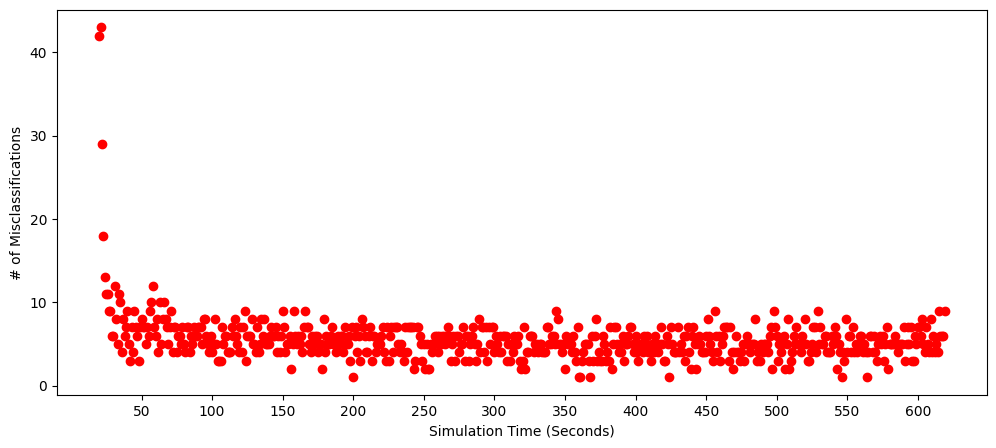

In [ ]:
#Graph of where misclassifications occured 
plt.figure(figsize=(12, 5), dpi=100)
graph = plt.plot(values_counts_df['Time'], values_counts_df['Counts'], 'ro')
plt.ylabel('# of Misclassifications')
plt.xlabel('Simulation Time (Seconds)')
plt.xticks([50,100,150,200,250,300,350,400,450,500,550,600])
plt.show()

In [ ]:
#Finding Percentage of misclassifications based on testing data
#Prediction_Dataset_2[0].head()
#Finding Counts from the test data
values_Test_set = Prediction_Dataset_2[0].value_counts().keys().tolist()
counts_Test_set = Prediction_Dataset_2[0].value_counts().tolist()
#Creating a Dataframe with the counts for the testing data
values_Test_df=pd.DataFrame(values_Test_set,columns=['Time'])
counts_Test_df=pd.DataFrame(counts_Test_set,columns=['Total Counts'])
values_counts_Test_df= pd.concat([values_Test_df,counts_Test_df],axis=1)
#print(values_counts_Test_df.tail())
#Sorting Testing counts by time and reseting the index 
values_counts_Test_df_Sorted_by_Time= values_counts_Test_df.sort_values(by=['Time'])
values_counts_Test_df_Sorted_by_Time.reset_index(drop=True, inplace=True)
#print(values_counts_Test_df_Sorted_by_Time)
#Sorting the misclassified counts by time and reseting the index 
values_counts_df_sorted_by_time=values_counts_df.sort_values(by=['Time'])
values_counts_df_sorted_by_time.reset_index(drop=True, inplace=True)
#print(values_counts_df_sorted_by_time)
#Merge the 2 dataset 
values_counts_Test_df_Sorted_by_Time= values_counts_Test_df_Sorted_by_Time.merge(values_counts_df_sorted_by_time)
#Creating a new column for the % of misclassications 
values_counts_Test_df_Sorted_by_Time.head()
values_counts_Test_df_Sorted_by_Time['% of Misclassifications'] = values_counts_Test_df_Sorted_by_Time['Counts']/values_counts_Test_df_Sorted_by_Time['Total Counts']
print(values_counts_Test_df_Sorted_by_Time)






     Time  Total Counts  Counts  % of Misclassifications
0      20            76      42                 0.552632
1      21            85      43                 0.505882
2      22            88      29                 0.329545
3      23            74      18                 0.243243
4      24            78      13                 0.166667
..    ...           ...     ...                      ...
595   615           101       9                 0.089109
596   616            88       6                 0.068182
597   617            85       6                 0.070588
598   618            81       6                 0.074074
599   619            78       9                 0.115385

[600 rows x 4 columns]


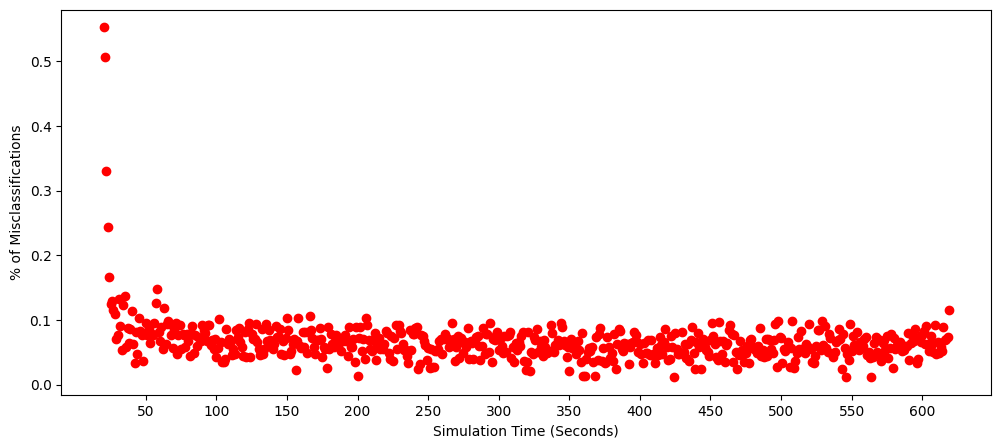

In [ ]:
#Plot of % of  Misclassifications 
plt.figure(figsize=(12, 5), dpi=100)
graph = plt.plot(values_counts_Test_df_Sorted_by_Time['Time'], values_counts_Test_df_Sorted_by_Time['% of Misclassifications'], 'ro')
plt.xticks([50,100,150,200,250,300,350,400,450,500,550,600])
plt.ylabel('% of Misclassifications')
plt.xlabel('Simulation Time (Seconds)')
plt.show()

In [ ]:
#Setting up confusion matrix and printing validation results 
#Printing Validation results
#Confusion Matrix
confmat= confusion_matrix(y_true=Y_test, y_pred=Y_pred)
print('Confusion Matrix')
print(confmat)
#Accuracy, Precision, Recall & F1 Results
acc = accuracy_score(Y_pred, Y_test) * 100
ps = precision_score(Y_pred, Y_test, average='macro') * 100
rs = recall_score(Y_pred, Y_test, average='macro') * 100
f1 = f1_score(Y_pred, Y_test, average='macro') * 100
print('Accuracy of this model is:', acc)
print('Precision of this model is:', ps)
print('Recall of this model is:', rs)
print('F1 of this model is:', f1)

Confusion Matrix
[[9050    0    0    0    0    0    0    0    0    0    0    0]
 [   0 3527    0    3    0    0    0    1  354    0    0  612]
 [   0    0 4440    0    0    0    0    0    0    0    0    0]
 [   0    3    0 4467    4    0    0    1    2    6    0    5]
 [   0    0    0    0 1504    0    0    0    0    0    0    0]
 [   0    4    0    2    1 4533    0    0    0    0    0    0]
 [   0    0    0    0    0    0 4469    0    0    0    0    0]
 [   0   17    0    0    0    0    0 4420    5    0    3   15]
 [   0  769    0    0    0    0    0    4 2497    0    0 1155]
 [   0    1    0   15    1    0    0    0    0 4508    0    1]
 [   0    5    0    2    5    0    0    3    3    2 4480    4]
 [   0  146    0    0    0    0    0   12  144    0    0 4328]]
Accuracy of this model is: 94.03958006950822
Precision of this model is: 93.82393687834472
Recall of this model is: 94.22910150285954
F1 of this model is: 93.68248301343014


In [ ]:
#Visualization of Confusion Matrix 
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    fig.set(dpi=100)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label',
           
          )

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names=['Transient Normal Operations','Transient Feedwater Pump Trip', 
'Transient LOCA LOOP', 'Transient Valve Closure ', 'Transient Rapid Power Change ', 
'Transient Depressurization ', 'Transient- Max Steam Line Rupture ',
'Transient-Manual Trip ', 'Transient Load Rejection ', 'Transient Single Coolant Pump Trip ', 
'Transient Total Coolant Pump Trip ', 'Transient Turbine Trip No SCRAM ']
plot_confusion_matrix(Y_test, Y_pred, classes=class_names,
                      title='Confusion Matrix Decision Tree Base Model, Random State = 0 CV=10')

plt.savefig('test.png', bbox_inches='tight')

Confusion matrix, without normalization
[[9050    0    0    0    0    0    0    0    0    0    0    0]
 [   0 3527    0    3    0    0    0    1  354    0    0  612]
 [   0    0 4440    0    0    0    0    0    0    0    0    0]
 [   0    3    0 4467    4    0    0    1    2    6    0    5]
 [   0    0    0    0 1504    0    0    0    0    0    0    0]
 [   0    4    0    2    1 4533    0    0    0    0    0    0]
 [   0    0    0    0    0    0 4469    0    0    0    0    0]
 [   0   17    0    0    0    0    0 4420    5    0    3   15]
 [   0  769    0    0    0    0    0    4 2497    0    0 1155]
 [   0    1    0   15    1    0    0    0    0 4508    0    1]
 [   0    5    0    2    5    0    0    3    3    2 4480    4]
 [   0  146    0    0    0    0    0   12  144    0    0 4328]]


In [ ]:
#Finding the individual accurcies of each transient 
print('Individual Transient Accuries')
#Normal Operations Accuracy 
True_Positives_Normal_Ops= confmat[0][0]
#print(True_Positives_Normal_Ops)
Total_Normal_Ops=confmat[0][:].sum()
#print(Total_Normal_Ops)
Normal_Ops_Acc=True_Positives_Normal_Ops/Total_Normal_Ops
print('Normal Operations accuracy:' + str(Normal_Ops_Acc))

#Feedwater Pump Trip Accuracy 
True_Positives_Feedwater_Pump_Trip=confmat[1][1]
#print(True_Positives_Feedwater_Pump_Trip)
Total_Feedwater_Pump_Trip=confmat[1][:].sum()+confmat[1][0].sum()
#print(Total_Feedwater_Pump_Trip)
Feedwater_Pump_Trip_Acc=True_Positives_Feedwater_Pump_Trip/Total_Feedwater_Pump_Trip
print('Feedwater Pump Trip accuracy:' + str(Feedwater_Pump_Trip_Acc))

#LOCA LOOP Accuracy 
True_Positives_LOCA_LOOP=confmat[2][2]
#print(True_Positives_LOCA_LOOP_Trip)
Total_LOCA_LOOP=confmat[2][:].sum()
#print(Total_LOCA_LOOP)
LOCA_LOOP_Acc=True_Positives_LOCA_LOOP/Total_LOCA_LOOP
print('LOCA LOOP accuracy:' + str(LOCA_LOOP_Acc))

#Valve Closures 
True_Positives_Valve_Closures=confmat[3][3]
#print(True_Positives_Valve_Closures)
Total_Valve_Closures=confmat[3][:].sum()
#print(Total_Valve_Closures)
Valve_Closures_Acc=True_Positives_Valve_Closures/Total_Valve_Closures
print('Valve Closure accuracy:' + str(Valve_Closures_Acc))

#Rapid Power Change 
True_Positives_Rapid_Power_Change=confmat[4][4]
#print(True_Positives_Rapid_Power_Change)
Total_Rapid_Power_Change=confmat[4][:].sum()
#print(Total_Rapid_Power_Change)
Rapid_Power_Change_Acc=True_Positives_Rapid_Power_Change/Total_Rapid_Power_Change
print('Rapid Power Change accuracy:' + str(Rapid_Power_Change_Acc))

#Depressurization 
True_Positives_Depressurization=confmat[5][5]
#print(True_Positives_Depressurization)
Total_Depressurization=confmat[5][:].sum()
#print(Total_Depressurization)
Depressurization_Acc=True_Positives_Depressurization/Total_Depressurization
print('Depressurization accuracy:' + str(Depressurization_Acc))

#Max Steam Line Rupture 
True_Positives_Max_Steam_Line_Rupture=confmat[6][6]
#print(True_Positives_Max_Steam_Line_Rupture)
Total_Max_Steam_Line_Rupture=confmat[6][:].sum()
#print(Total_Max_Steam_Line_Rupture)
Max_Steam_Line_Rupture_Acc=True_Positives_Max_Steam_Line_Rupture/Total_Max_Steam_Line_Rupture
print('Max Steam Line Rupture accuracy:' + str(Max_Steam_Line_Rupture_Acc))

#Manual Trip 
True_Positives_Manual_Trip=confmat[7][7]
#print(True_Positives_Manual_Trip)
Total_Manual_Trip=confmat[7][:].sum()
#print(Total_Manual_Trip)
Manual_Trip_Acc=True_Positives_Manual_Trip/Total_Manual_Trip
print('Manual Trip accuracy:' + str(Manual_Trip_Acc))

#Load Rejection 
True_Positives_Load_Rejection=confmat[8][8]
#print(True_Positives_Load_Rejection)
Total_Load_Rejection=confmat[8][:].sum()
#print(Total_Load_Rejection)
Load_Rejection_Acc=True_Positives_Load_Rejection/Total_Load_Rejection
print('Load Rejection accuracy:' + str(Load_Rejection_Acc))

#Single Coolant Pump Trip 
True_Positives_Single_Coolant_Pump_Trip=confmat[9][9]
#print(True_Positives_Single_Coolant_Pump_Trip)
Total_Single_Coolant_Pump_Trip=confmat[9][:].sum()
#print(Single_Coolant_Pump_Trip)
Single_Coolant_Pump_Trip_Acc=True_Positives_Single_Coolant_Pump_Trip/Total_Single_Coolant_Pump_Trip
print('Single Coolant Pump Trip accuracy:' + str(Single_Coolant_Pump_Trip_Acc))

#Total Coolant Pump Trip
True_Positives_Total_Coolant_Pump_Trip=confmat[10][10]
#print(True_Positives_Total_Coolant_Pump_Trip)
Total_Total_Coolant_Pump_Trip=confmat[10][:].sum()
#print(Total_Coolant_Pump_Trip)
Total_Coolant_Pump_Trip_Acc=True_Positives_Total_Coolant_Pump_Trip/Total_Total_Coolant_Pump_Trip
print('Total Coolant Pump Trip accuracy:' + str(Total_Coolant_Pump_Trip_Acc))

#Turbine Trip No SCRAM
True_Positives_Total_Tubrin_Trip_No_SCRAM=confmat[11][11]
#print(True_Positives_Total_Tubrin_Trip_No_SCRAM)
Total_Total_Tubrin_Trip_No_SCRAM=confmat[11][:].sum()
#print(Total_Total_Tubrin_Trip_No_SCRAM)
Tubrin_Trip_No_SCRAM_Acc=True_Positives_Total_Tubrin_Trip_No_SCRAM/Total_Total_Tubrin_Trip_No_SCRAM
print('Turbine Trip No SCRAM accuracy:' + str(Tubrin_Trip_No_SCRAM_Acc))


 

Individual Transient Accuries
Normal Operations accuracy:1.0
Feedwater Pump Trip accuracy:0.7843006448743607
LOCA LOOP accuracy:1.0
Valve Closure accuracy:0.9953208556149733
Rapid Power Change accuracy:1.0
Depressurization accuracy:0.9984581497797357
Max Steam Line Rupture accuracy:1.0
Manual Trip accuracy:0.9910313901345291
Load Rejection accuracy:0.5642937853107345
Single Coolant Pump Trip accuracy:0.9960229783473266
Total Coolant Pump Trip accuracy:0.9946714031971581
Turbine Trip No SCRAM accuracy:0.9347732181425485


#My stuff

##imports

In [ ]:
import keras
import tensorflow as tf

##data normalization (NOT USED)

In [ ]:
trmax = x_train.max()
trmin = x_train.min()
temax = x_test.max()
temin = x_test.min()
tr_norm = ((x_train.sort_index() - trmin)/ (trmax-trmin))
te_norm = ((x_test.sort_index() - trmin)/ (trmax-trmin))

In [ ]:
trmax

2         2.400
3         4.500
4       623.780
5       617.622
6       576.468
7       623.949
8       617.659
9       576.051
14      651.343
15      648.149
16      108.297
17      246.051
19      100.000
21     2581.390
22     2000.000
23     1243.600
24     1645.350
25     1645.780
26     1272.160
27     1275.660
28      598.218
29     2316.380
31      657.870
32      657.870
33     1547.820
EOL       1.000
MOL       1.000
dtype: float64

In [ ]:
trmin

2         0.0000
3         2.4000
4         4.5000
5       145.9040
6       109.4070
7       199.1790
8       113.3940
9       100.1910
14       99.4619
15      107.7320
16        0.0000
17       86.3664
19        0.0000
21        0.0000
22        0.0000
23        0.0000
24        0.0000
25        0.0000
26       26.9171
27       40.8993
28      175.7220
29     1700.0000
31      153.0720
32      153.0720
33      -19.2637
EOL       0.0000
MOL       0.0000
dtype: float64

In [ ]:
#max(x_train, x_test)

In [ ]:
y_train#.sort_index()

20144    2
60382    0
52134    0
6957     5
66021    4
        ..
21243    2
45891    0
42613    7
43567    7
68268    8
Name: 35, Length: 55533, dtype: int64

##Model creation

In [ ]:
keras.backend.clear_session()

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)#did val_accuracy for 1-9

###Model1
L .2875
A .8583

In [ ]:
model1 = keras.models.Sequential([
    keras.layers.Dense(27, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(18, activation='selu'),
    keras.layers.Dense(14, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model1.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
y_test.max()

11

In [ ]:
%time
history1 = model1.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Epoch 1/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.6854 - accuracy: 0.7477 - val_loss: 0.5150 - val_accuracy: 0.7731
Epoch 2/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4691 - accuracy: 0.8005 - val_loss: 0.4400 - val_accuracy: 0.7836
Epoch 3/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4347 - accuracy: 0.8092 - val_loss: 0.4308 - val_accuracy: 0.8018
Epoch 4/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4022 - accuracy: 0.8212 - val_loss: 0.6976 - val_accuracy: 0.7462
Epoch 5/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.3757 - accuracy: 0.8303 - val_loss: 0.3688 - val_accuracy: 0.8438
Epoch 6/50
1736/1736 [==============================] - 5s 3ms/step - loss: 0.3519 - accuracy: 0.8385 - val_loss: 0.5886 - val_accuracy: 0.7687
Epoch 7/50
1736/1736 [==============================] - 6s 4ms/step - lo

In [ ]:
model1.save("drive/MyDrive/CEADS Project Stuff/Adversarial stuff/Saved Models/GPWRModel1")

INFO:tensorflow:Assets written to: drive/MyDrive/CEADS Project Stuff/Adversarial stuff/Saved Models/GPWRModel1/assets


In [ ]:
model1R = keras.models.load_model("drive/MyDrive/CEADS Project Stuff/Adversarial stuff/Saved Models/GPWRModel1")

In [ ]:
model1R.evaluate(x_test,y_test)

1736/1736 [==============================] - 4s 2ms/step - loss: 0.2875 - accuracy: 0.8583


[0.28754669427871704, 0.8582824468612671]

###Model2

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Dense(27, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(20, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
history2 = model2.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 0 ns, sys: 23 µs, total: 23 µs
Wall time: 35.8 µs
Epoch 1/50
1736/1736 [==============================] - 7s 4ms/step - loss: 6.2896 - accuracy: 0.3349 - val_loss: 1.7405 - val_accuracy: 0.3249
Epoch 2/50
1736/1736 [==============================] - 6s 3ms/step - loss: 1.7293 - accuracy: 0.3246 - val_loss: 1.7369 - val_accuracy: 0.3233
Epoch 3/50
1736/1736 [==============================] - 6s 3ms/step - loss: 1.7386 - accuracy: 0.3236 - val_loss: 1.7641 - val_accuracy: 0.3202
Epoch 4/50
1736/1736 [==============================] - 6s 3ms/step - loss: 1.7335 - accuracy: 0.3242 - val_loss: 1.7357 - val_accuracy: 0.3220
Epoch 5/50
1736/1736 [==============================] - 5s 3ms/step - loss: 1.7379 - accuracy: 0.3228 - val_loss: 1.7320 - val_accuracy: 0.3229
Epoch 6/50
1736/1736 [==============================] - 9s 5ms/step - loss: 1.7315 - accuracy: 0.3233 - val_loss: 1.7234 - val_accuracy: 0.3251
Epoch 7/50
1736/1736 [==============================] - 6s 3ms/step - 

###Model3

In [ ]:
model3 = keras.models.Sequential([
    keras.layers.Dense(27, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(20, activation='selu'),
    keras.layers.Dense(20, activation='selu'),
    keras.layers.Dense(20, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model3.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
history3 = model3.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.78 µs
Epoch 1/50
1736/1736 [==============================] - 7s 4ms/step - loss: 2.3192 - accuracy: 0.5737 - val_loss: 1.0911 - val_accuracy: 0.5849
Epoch 2/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.8622 - accuracy: 0.6618 - val_loss: 0.7763 - val_accuracy: 0.6835
Epoch 3/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.7657 - accuracy: 0.6814 - val_loss: 0.9781 - val_accuracy: 0.6478
Epoch 4/50
1736/1736 [==============================] - 5s 3ms/step - loss: 0.7123 - accuracy: 0.6966 - val_loss: 0.6722 - val_accuracy: 0.6921
Epoch 5/50
1736/1736 [==============================] - 5s 3ms/step - loss: 0.6507 - accuracy: 0.7285 - val_loss: 0.5833 - val_accuracy: 0.7485
Epoch 6/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.5898 - accuracy: 0.7484 - val_loss: 0.5116 - val_accuracy: 0.7724
Epoch 7/50
1736/1736 [==============================] - 5s 3ms/step - lo

In [ ]:
model3.save("drive/MyDrive/CEADS Project Stuff/Adversarial stuff/Saved Models/GPWRModel3")

INFO:tensorflow:Assets written to: drive/MyDrive/CEADS Project Stuff/Adversarial stuff/Saved Models/GPWRModel3/assets


In [ ]:
model3R = keras.models.load_model("drive/MyDrive/CEADS Project Stuff/Adversarial stuff/Saved Models/GPWRModel3")

In [ ]:
model3R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 1ms/step - loss: 0.4044 - accuracy: 0.8333


[0.4043944776058197, 0.8332703113555908]

###Model4
L .2838 
A .8637

In [ ]:
model4 = keras.models.Sequential([
    keras.layers.Dense(27, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(24, activation='selu'),
    keras.layers.Dense(20, activation='selu'),
    keras.layers.Dense(16, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model4.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
history4 = model4.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs
Epoch 1/50
1736/1736 [==============================] - 57s 3ms/step - loss: 4.5916 - accuracy: 0.5923 - val_loss: 0.8729 - val_accuracy: 0.6580
Epoch 2/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.7906 - accuracy: 0.7001 - val_loss: 0.6779 - val_accuracy: 0.7392
Epoch 3/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.6495 - accuracy: 0.7498 - val_loss: 0.6111 - val_accuracy: 0.7563
Epoch 4/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.5331 - accuracy: 0.7854 - val_loss: 0.5355 - val_accuracy: 0.7751
Epoch 5/50
1736/1736 [==============================] - 5s 3ms/step - loss: 0.4557 - accuracy: 0.8061 - val_loss: 0.4829 - val_accuracy: 0.7733
Epoch 6/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4517 - accuracy: 0.8040 - val_loss: 0.7516 - val_accuracy: 0.7305
Epoch 7/50
1736/1736 [==============================] - 6s 3ms/step - los

In [ ]:
model4.save("drive/MyDrive/CEADS Project Stuff/Adversarial stuff/Saved Models/GPWRModel4")

INFO:tensorflow:Assets written to: drive/MyDrive/CEADS Project Stuff/Adversarial stuff/Saved Models/GPWRModel4/assets


In [ ]:
model4R = keras.models.load_model("drive/MyDrive/CEADS Project Stuff/Adversarial stuff/Saved Models/GPWRModel4")

In [ ]:
model4R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.8637


[0.28375357389450073, 0.8637386560440063]

###Model5
L .2672
A .8626

In [ ]:
model5 = keras.models.Sequential([
    keras.layers.Dense(27, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(25, activation='selu'),
    keras.layers.Dense(23, activation='selu'),
    keras.layers.Dense(21, activation='selu'),
    keras.layers.Dense(18, activation='selu'),
    keras.layers.Dense(15, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model5.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
history5 = model5.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
Epoch 1/50
1736/1736 [==============================] - 16s 8ms/step - loss: 1.4500 - accuracy: 0.6298 - val_loss: 1.3286 - val_accuracy: 0.5741
Epoch 2/50
1736/1736 [==============================] - 9s 5ms/step - loss: 0.7568 - accuracy: 0.7016 - val_loss: 0.6304 - val_accuracy: 0.7329
Epoch 3/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.5682 - accuracy: 0.7635 - val_loss: 0.5033 - val_accuracy: 0.7810
Epoch 4/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4646 - accuracy: 0.7978 - val_loss: 0.3972 - val_accuracy: 0.8207
Epoch 5/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4163 - accuracy: 0.8138 - val_loss: 0.5375 - val_accuracy: 0.7645
Epoch 6/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.3944 - accuracy: 0.8222 - val_loss: 0.4024 - val_accuracy: 0.8044
Epoch 7/50
1736/1736 [==============================] - 7s 4ms/step - l

In [ ]:
model5.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel5")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel5/assets


In [ ]:
model5R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model5R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.8626


[0.26722434163093567, 0.8625862002372742]

###Model6
L .2778
A .8597

In [ ]:
model6 = keras.models.Sequential([
    keras.layers.Dense(27, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(26, activation='selu'),
    keras.layers.Dense(25, activation='selu'),
    keras.layers.Dense(24, activation='selu'),
    keras.layers.Dense(23, activation='selu'),
    keras.layers.Dense(22, activation='selu'),
    keras.layers.Dense(21, activation='selu'),
    keras.layers.Dense(20, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model6.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
history6 = model6.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs
Epoch 1/50
1736/1736 [==============================] - 10s 4ms/step - loss: 1.8898 - accuracy: 0.6347 - val_loss: 0.8177 - val_accuracy: 0.7032
Epoch 2/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.6744 - accuracy: 0.7297 - val_loss: 0.4748 - val_accuracy: 0.7920
Epoch 3/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.6060 - accuracy: 0.7536 - val_loss: 0.4875 - val_accuracy: 0.7863
Epoch 4/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.5462 - accuracy: 0.7709 - val_loss: 0.4367 - val_accuracy: 0.8050
Epoch 5/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4254 - accuracy: 0.8068 - val_loss: 0.4190 - val_accuracy: 0.8074
Epoch 6/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4045 - accuracy: 0.8150 - val_loss: 0.4677 - val_accuracy: 0.8042
Epoch 7/50
1736/1736 [==============================] - 7s 4ms/step - l

In [ ]:
model6.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel6")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel6/assets


In [ ]:
model6R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel6")

In [ ]:
model6R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2778 - accuracy: 0.8597


[0.27777835726737976, 0.8596510291099548]

###Model7
loss: 0.3118 - accuracy: 0.8518

In [ ]:
model7 = keras.models.Sequential([
    keras.layers.Dense(27, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(25, activation='selu'),
    keras.layers.Dense(23, activation='selu'),
    keras.layers.Dense(21, activation='selu'),
    keras.layers.Dense(19, activation='selu'),
    keras.layers.Dense(17, activation='selu'),
    keras.layers.Dense(15, activation='selu'),
    keras.layers.Dense(13, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model7.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
history7 = model7.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs
Epoch 1/50
1736/1736 [==============================] - 10s 5ms/step - loss: 1.7306 - accuracy: 0.5882 - val_loss: 0.9034 - val_accuracy: 0.6469
Epoch 2/50
1736/1736 [==============================] - 15s 9ms/step - loss: 0.9101 - accuracy: 0.6522 - val_loss: 0.7931 - val_accuracy: 0.6833
Epoch 3/50
1736/1736 [==============================] - 8s 4ms/step - loss: 0.6975 - accuracy: 0.7090 - val_loss: 1.1105 - val_accuracy: 0.6351
Epoch 4/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.5984 - accuracy: 0.7397 - val_loss: 0.6119 - val_accuracy: 0.7265
Epoch 5/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.5371 - accuracy: 0.7612 - val_loss: 0.7130 - val_accuracy: 0.7056
Epoch 6/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.5006 - accuracy: 0.7750 - val_loss: 1.1252 - val_accuracy: 0.6525
Epoch 7/50
1736/1736 [==============================] - 7s 4ms/step - lo

In [ ]:
model7.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel7")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel7/assets


In [ ]:
model7R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel7")

In [ ]:
model7R.evaluate(x_test,y_test)

1736/1736 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8518


[0.3118135631084442, 0.8518358469009399]

###Model8
loss: 0.2707 - accuracy: 0.8610

val_loss: 0.2658 - val_accuracy: 0.8605

In [ ]:
model8 = keras.models.Sequential([
    keras.layers.Dense(27, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(25, activation='selu'),
    keras.layers.Dense(23, activation='selu'),
    keras.layers.Dense(21, activation='selu'),
    keras.layers.Dense(19, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model8.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
history8 = model8.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 14.1 µs
Epoch 1/50
1736/1736 [==============================] - 15s 7ms/step - loss: 3.0589 - accuracy: 0.6216 - val_loss: 1.2026 - val_accuracy: 0.6200
Epoch 2/50
1736/1736 [==============================] - 11s 6ms/step - loss: 0.7197 - accuracy: 0.7087 - val_loss: 0.5963 - val_accuracy: 0.7695
Epoch 3/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.5845 - accuracy: 0.7503 - val_loss: 0.4725 - val_accuracy: 0.7898
Epoch 4/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4721 - accuracy: 0.7888 - val_loss: 0.4411 - val_accuracy: 0.7867
Epoch 5/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4218 - accuracy: 0.8081 - val_loss: 0.4814 - val_accuracy: 0.7758
Epoch 6/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.3940 - accuracy: 0.8166 - val_loss: 0.4273 - val_accuracy: 0.8082
Epoch 7/50
1736/1736 [==============================] - 6s 4ms/ste

In [ ]:
model8.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel8")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel8/assets


In [ ]:
model8R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel8")

In [ ]:
model8R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2707 - accuracy: 0.8610


[0.27074769139289856, 0.8610015511512756]

###Model9

In [ ]:
model9 = keras.models.Sequential([
    keras.layers.Dense(27, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(25, activation='selu'),
    keras.layers.Dense(23, activation='selu'),
    keras.layers.Dense(21, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model9.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
history9 = model9.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Epoch 1/50
1736/1736 [==============================] - 8s 4ms/step - loss: 5.0052 - accuracy: 0.5762 - val_loss: 1.3883 - val_accuracy: 0.5826
Epoch 2/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.8890 - accuracy: 0.6668 - val_loss: 0.8755 - val_accuracy: 0.6516
Epoch 3/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.7575 - accuracy: 0.6994 - val_loss: 0.8695 - val_accuracy: 0.6881
Epoch 4/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.6575 - accuracy: 0.7331 - val_loss: 0.6023 - val_accuracy: 0.7491
Epoch 5/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.5566 - accuracy: 0.7703 - val_loss: 0.5986 - val_accuracy: 0.7354
Epoch 6/50
1736/1736 [==============================] - 9s 5ms/step - loss: 0.4805 - accuracy: 0.7973 - val_loss: 0.4168 - val_accuracy: 0.8183
Epoch 7/50
1736/1736 [==============================] - 6s 4ms/step - lo

In [ ]:
model9.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel9")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel9/assets


In [ ]:
model9R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel9")

In [ ]:
model9R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.3286 - accuracy: 0.8486


[0.32860100269317627, 0.8486125469207764]

###Model10
loss: 0.2574 - accuracy: 0.8659

In [ ]:
model10 = keras.models.Sequential([
    keras.layers.Dense(27, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(25, activation='selu'),
    keras.layers.Dense(23, activation='selu'),
    keras.layers.Dense(21, activation='selu'),
    keras.layers.Dense(19, activation='selu'),
    keras.layers.Dense(17, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model10.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
history10 = model10.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs
Epoch 1/50
1736/1736 [==============================] - 13s 6ms/step - loss: 2.4187 - accuracy: 0.5851 - val_loss: 0.9139 - val_accuracy: 0.6796
Epoch 2/50
1736/1736 [==============================] - 12s 7ms/step - loss: 0.7488 - accuracy: 0.6940 - val_loss: 0.7738 - val_accuracy: 0.6771
Epoch 3/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.5955 - accuracy: 0.7440 - val_loss: 0.8361 - val_accuracy: 0.6874
Epoch 4/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.5216 - accuracy: 0.7739 - val_loss: 0.5208 - val_accuracy: 0.7693
Epoch 5/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.4688 - accuracy: 0.7929 - val_loss: 0.4830 - val_accuracy: 0.7867
Epoch 6/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4025 - accuracy: 0.8167 - val_loss: 0.3475 - val_accuracy: 0.8438
Epoch 7/50
1736/1736 [==============================] - 7s 4ms/step - 

In [ ]:
model10.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel10")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel10/assets


In [ ]:
model10R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel10")

In [ ]:
model10R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2574 - accuracy: 0.8659


[0.2574198246002197, 0.8658815622329712]

###Model11
loss: 0.2536 - accuracy: 0.8670

In [ ]:
model11 = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(50, activation='selu'),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model11.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
history11 = model11.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs
Epoch 1/50
1736/1736 [==============================] - 8s 4ms/step - loss: 2.7653 - accuracy: 0.6394 - val_loss: 1.4306 - val_accuracy: 0.6393
Epoch 2/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.7383 - accuracy: 0.7204 - val_loss: 3.0400 - val_accuracy: 0.5530
Epoch 3/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.6093 - accuracy: 0.7585 - val_loss: 0.7272 - val_accuracy: 0.7679
Epoch 4/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4996 - accuracy: 0.7959 - val_loss: 0.4626 - val_accuracy: 0.7925
Epoch 5/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.4166 - accuracy: 0.8183 - val_loss: 0.4537 - val_accuracy: 0.7870
Epoch 6/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.3843 - accuracy: 0.8281 - val_loss: 0.3555 - val_accuracy: 0.8222
Epoch 7/50
1736/1736 [==============================] - 7s 4ms/step - loss

In [ ]:
model11.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel11")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel11/assets


In [ ]:
model11R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel11")

In [ ]:
model11R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2536 - accuracy: 0.8670


[0.2536261975765228, 0.866998016834259]

###Model12
loss: 0.2834 - accuracy: 0.8555

In [ ]:
model12 = keras.models.Sequential([
    keras.layers.Dense(250, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(200, activation='selu'),
    keras.layers.Dense(150, activation='selu'),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(50, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
model12.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
history12 = model12.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11 µs
Epoch 1/50
1736/1736 [==============================] - 13s 7ms/step - loss: 2.0446 - accuracy: 0.5937 - val_loss: 0.9180 - val_accuracy: 0.6226
Epoch 2/50
1736/1736 [==============================] - 12s 7ms/step - loss: 0.7480 - accuracy: 0.6993 - val_loss: 2.5284 - val_accuracy: 0.4386
Epoch 3/50
1736/1736 [==============================] - 20s 12ms/step - loss: 0.6400 - accuracy: 0.7434 - val_loss: 1.6592 - val_accuracy: 0.6124
Epoch 4/50
1736/1736 [==============================] - 10s 6ms/step - loss: 0.4462 - accuracy: 0.8038 - val_loss: 0.4157 - val_accuracy: 0.8218
Epoch 5/50
1736/1736 [==============================] - 12s 7ms/step - loss: 0.4470 - accuracy: 0.8103 - val_loss: 0.3908 - val_accuracy: 0.8181
Epoch 6/50
1736/1736 [==============================] - 9s 5ms/step - loss: 0.3639 - accuracy: 0.8331 - val_loss: 0.8826 - val_accuracy: 0.6967
Epoch 7/50
1736/1736 [==============================] - 10s 6ms/step

In [ ]:
model12.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel12")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel12/assets


In [ ]:
model12R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel12")

In [ ]:
model12R.evaluate(x_test,y_test)

1736/1736 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.8555


[0.2833791971206665, 0.8555453419685364]

###Model13
loss: 0.2616 - accuracy: 0.8617

val_loss: 0.2671 - val_accuracy: 0.8680

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(128, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(128, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Epoch 1/50
1736/1736 [==============================] - 9s 4ms/step - loss: 1.5690 - accuracy: 0.5911 - val_loss: 0.9190 - val_accuracy: 0.6245
Epoch 2/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.7841 - accuracy: 0.6948 - val_loss: 1.0307 - val_accuracy: 0.6728
Epoch 3/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.5708 - accuracy: 0.7572 - val_loss: 0.4710 - val_accuracy: 0.7972
Epoch 4/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.5064 - accuracy: 0.7813 - val_loss: 0.4100 - val_accuracy: 0.8036
Epoch 5/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4030 - accuracy: 0.8136 - val_loss: 0.4115 - val_accuracy: 0.8071
Epoch 6/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.3722 - accuracy: 0.8248 - val_loss: 0.3305 - val_accuracy: 0.8446
Epoch 7/50
1736/1736 [==============================] - 7s 4ms/step - lo

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel13")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel13/assets


In [ ]:
model13R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel13")

In [ ]:
model13R.evaluate(x_test,y_test)

1736/1736 [==============================] - 5s 3ms/step - loss: 0.2616 - accuracy: 0.8617


[0.261584609746933, 0.861667811870575]

###Model14
loss: 0.2621 - accuracy: 0.8636

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(128, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(128, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(16, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs
Epoch 1/50
1736/1736 [==============================] - 13s 6ms/step - loss: 1.7409 - accuracy: 0.5480 - val_loss: 2.0517 - val_accuracy: 0.4409
Epoch 2/50
1736/1736 [==============================] - 15s 9ms/step - loss: 0.9825 - accuracy: 0.6162 - val_loss: 0.8782 - val_accuracy: 0.6436
Epoch 3/50
1736/1736 [==============================] - 9s 5ms/step - loss: 0.8060 - accuracy: 0.6568 - val_loss: 0.7206 - val_accuracy: 0.6840
Epoch 4/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.6925 - accuracy: 0.7012 - val_loss: 0.8134 - val_accuracy: 0.7581
Epoch 5/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.5277 - accuracy: 0.7723 - val_loss: 0.4616 - val_accuracy: 0.7872
Epoch 6/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4950 - accuracy: 0.7869 - val_loss: 0.4619 - val_accuracy: 0.7729
Epoch 7/50
1736/1736 [==============================] - 7s 4ms/step - lo

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel14")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel14/assets


In [ ]:
model14R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel14")

In [ ]:
model14R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2621 - accuracy: 0.8636


[0.2621265947818756, 0.8636306524276733]

###Model15
loss: 0.2599 - accuracy: 0.8613

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(128, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(128, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
Epoch 1/50
1736/1736 [==============================] - 9s 4ms/step - loss: 1.7802 - accuracy: 0.6238 - val_loss: 1.0384 - val_accuracy: 0.6211
Epoch 2/50
1736/1736 [==============================] - 10s 6ms/step - loss: 0.7516 - accuracy: 0.7048 - val_loss: 0.6686 - val_accuracy: 0.7288
Epoch 3/50
1736/1736 [==============================] - 14s 8ms/step - loss: 0.5622 - accuracy: 0.7668 - val_loss: 0.4070 - val_accuracy: 0.8247
Epoch 4/50
1736/1736 [==============================] - 8s 5ms/step - loss: 0.4265 - accuracy: 0.8101 - val_loss: 0.4720 - val_accuracy: 0.7974
Epoch 5/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4015 - accuracy: 0.8219 - val_loss: 0.3740 - val_accuracy: 0.8123
Epoch 6/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.3582 - accuracy: 0.8354 - val_loss: 0.3241 - val_accuracy: 0.8500
Epoch 7/50
1736/1736 [==============================] - 7s 4ms/step - l

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel15")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel15/assets


In [ ]:
model15R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel15")

In [ ]:
model15R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2599 - accuracy: 0.8613


[0.25991174578666687, 0.8613436818122864]

###Model16
loss: 0.2657 - accuracy: 0.8656

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(82, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(50, activation='selu'),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs
Epoch 1/50
1736/1736 [==============================] - 9s 4ms/step - loss: 2.0764 - accuracy: 0.5908 - val_loss: 1.0275 - val_accuracy: 0.6602
Epoch 2/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.7882 - accuracy: 0.6977 - val_loss: 0.7642 - val_accuracy: 0.6755
Epoch 3/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.6048 - accuracy: 0.7501 - val_loss: 0.6355 - val_accuracy: 0.7423
Epoch 4/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4973 - accuracy: 0.7863 - val_loss: 0.4861 - val_accuracy: 0.8035
Epoch 5/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4664 - accuracy: 0.8023 - val_loss: 0.4657 - val_accuracy: 0.7929
Epoch 6/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.3884 - accuracy: 0.8256 - val_loss: 0.3531 - val_accuracy: 0.8224
Epoch 7/50
1736/1736 [==============================] - 6s 4ms/step - lo

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel16")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel16/assets


In [ ]:
model16R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel16")

In [ ]:
model16R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2657 - accuracy: 0.8656


[0.2657473683357239, 0.8656114339828491]

###Model17
loss: 0.2566 - accuracy: 0.8634

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(128, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Epoch 1/50
1736/1736 [==============================] - 7s 3ms/step - loss: 6.7196 - accuracy: 0.6256 - val_loss: 1.7828 - val_accuracy: 0.6401
Epoch 2/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.8062 - accuracy: 0.7469 - val_loss: 0.6919 - val_accuracy: 0.7402
Epoch 3/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.5608 - accuracy: 0.7832 - val_loss: 0.5680 - val_accuracy: 0.7662
Epoch 4/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4767 - accuracy: 0.8015 - val_loss: 0.5379 - val_accuracy: 0.7953
Epoch 5/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.4248 - accuracy: 0.8162 - val_loss: 0.3939 - val_accuracy: 0.8355
Epoch 6/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.4131 - accuracy: 0.8197 - val_loss: 0.3929 - val_accuracy: 0.8011
Epoch 7/50
1736/1736 [==============================] - 6s 4ms/step - lo

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel17")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel17/assets


In [ ]:
model17R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel17")

In [ ]:
model17R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2566 - accuracy: 0.8634


[0.2565963864326477, 0.8633965253829956]

###Model18
loss: 0.2617 - accuracy: 0.8669

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(128, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(80, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
Epoch 1/50
1736/1736 [==============================] - 8s 4ms/step - loss: 2.8292 - accuracy: 0.6228 - val_loss: 0.9830 - val_accuracy: 0.6672
Epoch 2/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.8287 - accuracy: 0.6918 - val_loss: 0.6799 - val_accuracy: 0.7403
Epoch 3/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.6315 - accuracy: 0.7471 - val_loss: 0.7354 - val_accuracy: 0.6719
Epoch 4/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.4868 - accuracy: 0.7939 - val_loss: 0.4595 - val_accuracy: 0.7833
Epoch 5/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.4287 - accuracy: 0.8144 - val_loss: 0.3708 - val_accuracy: 0.8448
Epoch 6/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.3714 - accuracy: 0.8292 - val_loss: 0.3483 - val_accuracy: 0.8292
Epoch 7/50
1736/1736 [==============================] - 7s 4ms/step - lo

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel18")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel18/assets


In [ ]:
model18R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel18")

In [ ]:
model18R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.8669


[0.261689692735672, 0.8669079542160034]

###Model19
loss: 0.2783 - accuracy: 0.8599

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(128, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(80, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs
Epoch 1/50
1736/1736 [==============================] - 10s 5ms/step - loss: 5.8231 - accuracy: 0.6460 - val_loss: 0.7989 - val_accuracy: 0.7438
Epoch 2/50
1736/1736 [==============================] - 11s 6ms/step - loss: 0.7329 - accuracy: 0.7477 - val_loss: 0.5121 - val_accuracy: 0.7805
Epoch 3/50
1736/1736 [==============================] - 7s 4ms/step - loss: 0.5670 - accuracy: 0.7782 - val_loss: 0.5160 - val_accuracy: 0.7865
Epoch 4/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.6306 - accuracy: 0.7693 - val_loss: 0.9659 - val_accuracy: 0.6356
Epoch 5/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.5633 - accuracy: 0.7668 - val_loss: 0.4247 - val_accuracy: 0.8128
Epoch 6/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.4076 - accuracy: 0.8175 - val_loss: 0.4743 - val_accuracy: 0.7971
Epoch 7/50
1736/1736 [==============================] - 6s 4ms/step - 

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel19")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel19/assets


In [ ]:
model19R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel19")

In [ ]:
model19R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2783 - accuracy: 0.8599


[0.27828872203826904, 0.85990309715271]

###Model20
loss: 0.2461 - accuracy: 0.8675

Winner!!

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(50, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs
Epoch 1/50
1736/1736 [==============================] - 8s 4ms/step - loss: 6.6055 - accuracy: 0.6173 - val_loss: 1.9139 - val_accuracy: 0.7025
Epoch 2/50
1736/1736 [==============================] - 8s 5ms/step - loss: 0.9197 - accuracy: 0.7319 - val_loss: 1.0235 - val_accuracy: 0.7001
Epoch 3/50
1736/1736 [==============================] - 11s 6ms/step - loss: 0.6325 - accuracy: 0.7688 - val_loss: 0.6435 - val_accuracy: 0.7880
Epoch 4/50
1736/1736 [==============================] - 5s 3ms/step - loss: 0.5332 - accuracy: 0.7858 - val_loss: 0.5022 - val_accuracy: 0.8115
Epoch 5/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.5321 - accuracy: 0.7870 - val_loss: 0.5995 - val_accuracy: 0.7621
Epoch 6/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4342 - accuracy: 0.8123 - val_loss: 0.7409 - val_accuracy: 0.7322
Epoch 7/50
1736/1736 [==============================] - 6s 3ms/step - l

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel20")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel20/assets


In [ ]:
model20R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel20")

In [ ]:
model20R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2461 - accuracy: 0.8675


[0.24614733457565308, 0.8674842119216919]

###Model21
loss: 0.2495 - accuracy: 0.8670

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(64, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(50, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs
Epoch 1/50
1736/1736 [==============================] - 10s 5ms/step - loss: 9.7038 - accuracy: 0.5919 - val_loss: 2.2402 - val_accuracy: 0.6805
Epoch 2/50
1736/1736 [==============================] - 6s 3ms/step - loss: 1.3065 - accuracy: 0.6995 - val_loss: 0.8833 - val_accuracy: 0.7353
Epoch 3/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.8221 - accuracy: 0.7383 - val_loss: 1.3849 - val_accuracy: 0.6763
Epoch 4/50
1736/1736 [==============================] - 5s 3ms/step - loss: 0.6081 - accuracy: 0.7721 - val_loss: 0.4432 - val_accuracy: 0.8174
Epoch 5/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4945 - accuracy: 0.7977 - val_loss: 0.3992 - val_accuracy: 0.8268
Epoch 6/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4200 - accuracy: 0.8177 - val_loss: 0.3678 - val_accuracy: 0.8306
Epoch 7/50
1736/1736 [==============================] - 6s 3ms/step

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel21")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel21/assets


In [ ]:
model21R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel21")

In [ ]:
model21R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 1ms/step - loss: 0.2495 - accuracy: 0.8670


[0.2495456337928772, 0.866998016834259]

###Model22
loss: 0.2670 - accuracy: 0.8638

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(64, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(46, activation='selu'),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Epoch 1/50
1736/1736 [==============================] - 10s 5ms/step - loss: 5.1811 - accuracy: 0.6111 - val_loss: 0.9638 - val_accuracy: 0.7098
Epoch 2/50
1736/1736 [==============================] - 5s 3ms/step - loss: 0.9833 - accuracy: 0.7072 - val_loss: 0.5894 - val_accuracy: 0.7848
Epoch 3/50
1736/1736 [==============================] - 5s 3ms/step - loss: 0.6677 - accuracy: 0.7552 - val_loss: 0.7516 - val_accuracy: 0.7445
Epoch 4/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.5420 - accuracy: 0.7872 - val_loss: 0.4502 - val_accuracy: 0.8269
Epoch 5/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4551 - accuracy: 0.8061 - val_loss: 0.4163 - val_accuracy: 0.8064
Epoch 6/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4017 - accuracy: 0.8239 - val_loss: 0.4887 - val_accuracy: 0.7832
Epoch 7/50
1736/1736 [==============================] - 6s 3ms/step - l

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel22")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel22/assets


In [ ]:
model22R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel22")

In [ ]:
model22R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.8638


[0.2669793665409088, 0.8637747168540955]

###Model23
loss: 0.2626 - accuracy: 0.8609

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(64, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(46, activation='selu'),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs
Epoch 1/50
1736/1736 [==============================] - 8s 4ms/step - loss: 6.2926 - accuracy: 0.6022 - val_loss: 1.3423 - val_accuracy: 0.5886
Epoch 2/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.8896 - accuracy: 0.6926 - val_loss: 1.0493 - val_accuracy: 0.6479
Epoch 3/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.7265 - accuracy: 0.7247 - val_loss: 0.6988 - val_accuracy: 0.6914
Epoch 4/50
1736/1736 [==============================] - 5s 3ms/step - loss: 0.6107 - accuracy: 0.7621 - val_loss: 0.6456 - val_accuracy: 0.7335
Epoch 5/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.4501 - accuracy: 0.8059 - val_loss: 0.4408 - val_accuracy: 0.7941
Epoch 6/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.4136 - accuracy: 0.8143 - val_loss: 0.8232 - val_accuracy: 0.7020
Epoch 7/50
1736/1736 [==============================] - 5s 3ms/step - lo

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel23")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel23/assets


In [ ]:
model23R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel23")

In [ ]:
model23R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 1ms/step - loss: 0.2626 - accuracy: 0.8609


[0.26263031363487244, 0.8609115481376648]

###Model24
loss: 0.2664 - accuracy: 0.8645

In [ ]:
keras.backend.clear_session()
MODEL = 0
keras.backend.clear_session()
MODEL = keras.models.Sequential([
    keras.layers.Dense(64, activation="selu", input_shape = (27,)),#, input_shape=(784,)
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(64, activation='selu'),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(12, activation='softmax')
])
MODEL.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
%time
HISTORY = MODEL.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[stop_early], validation_data=(x_test,y_test))
#.to_numpy().astype(float)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.3 µs
Epoch 1/50
1736/1736 [==============================] - 7s 3ms/step - loss: 2.6996 - accuracy: 0.6129 - val_loss: 1.0539 - val_accuracy: 0.6325
Epoch 2/50
1736/1736 [==============================] - 5s 3ms/step - loss: 0.7143 - accuracy: 0.7320 - val_loss: 0.5931 - val_accuracy: 0.7486
Epoch 3/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.5453 - accuracy: 0.7754 - val_loss: 0.5554 - val_accuracy: 0.7573
Epoch 4/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.4589 - accuracy: 0.8032 - val_loss: 0.4851 - val_accuracy: 0.8143
Epoch 5/50
1736/1736 [==============================] - 6s 3ms/step - loss: 0.3983 - accuracy: 0.8208 - val_loss: 0.5852 - val_accuracy: 0.7719
Epoch 6/50
1736/1736 [==============================] - 6s 4ms/step - loss: 0.3731 - accuracy: 0.8287 - val_loss: 0.3908 - val_accuracy: 0.8099
Epoch 7/50
1736/1736 [==============================] - 6s 3ms/step -

In [ ]:
MODEL.save("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel24")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel24/assets


In [ ]:
model24R = keras.models.load_model("/content/drive/MyDrive/CEADS Project Stuff/Adversarial stuff/FGSM Experiments/Saved Models/GPWRModel24")

In [ ]:
model24R.evaluate(x_test,y_test)

1736/1736 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.8645


[0.2664053738117218, 0.8644769787788391]

##FGSM attempts

##Functions

In [ ]:
def FGSM(model, input, target, eps=.01):
  input = tf.cast(input, tf.float32)
  loss_object = tf.keras.losses.CategoricalCrossentropy()
  with tf.GradientTape() as tape:
    tape.watch(input)
    prediction = model(input)
    loss = -loss_object(target, prediction)
  gradient = tape.gradient(loss, input)
  signed_grad = tf.sign(gradient)
  weights = unnormalize(signed_grad, trmin, trmax)
  return (weights*eps).numpy()

In [ ]:
def giveLabel(number):
  labelx = tf.one_hot(number,12)
  return tf.reshape(labelx, (1,12))

In [ ]:
def FuncStep(func,model,input,label,eps,steps):
  temp = input
  for x in range(steps):
    noise = func(model, temp, label, eps/steps)
    #temp = np.clip(temp+noise, 0, 255)
    temp = np.clip(temp+noise, trmin.to_numpy(), trmax.to_numpy())
  return temp

In [ ]:
def printTable(func,model,input,eps,steps):
  df = pd.DataFrame(columns=range(12))
  for x in range(12):
    adv = FuncStep(FGSM, model, input, giveLabel(x), eps, steps)
    predictions = (model.predict(adv).round(4))[0]
    df.loc[x] = predictions.tolist()
  print(df)
  return

In [ ]:
def normalize(xp, xmin, xmax):
  range = (xmax - xmin)
  dif = (xp - xmin)
  data_norm = ((xp - xmin)/ range).fillna(1)
  return

In [ ]:
def unnormalize(xp,xmin,xmax):
  return xp*(xmax - xmin) + xmin

In [ ]:
trmax = x_train.max()
trmin = x_train.min()
temax = x_test.max()
temin = x_test.min()
tr_norm = ((x_train.sort_index() - trmin)/ (trmax-trmin))
te_norm = ((x_test.sort_index() - trmin)/ (trmax-trmin))

##FGSM stuff

In [ ]:
noise = FGSM(model1, x_train.to_numpy()[0:1],giveLabel(5),.01)

In [ ]:
adv = x_train.to_numpy()[0] + noise
adv

array([[ 2.37600000e+00,  4.50300000e+00,  3.39252800e+02,
         3.22446860e+02,  3.22588460e+02,  3.40845490e+02,
         3.33042590e+02,  3.23118310e+02,  3.27025430e+02,
         1.19299490e+02,  9.94272990e+00,  1.66497818e+02,
         2.45063000e+01,  2.58138981e+01,  2.00000000e+01,
         1.24359999e+01, -1.04488888e+01, -1.64577999e+01,
         2.44268601e+02,  3.61846600e+02,  3.36089180e+02,
         1.71083620e+03,  3.29703700e+02,  3.29703700e+02,
         1.60945600e+01,  9.90000000e-01, -9.99999978e-03]])

In [ ]:
adv_clip = adv.clip(trmin.to_numpy(), trmax.to_numpy())
adv_clip

array([[2.37600000e+00, 4.50000000e+00, 3.39252800e+02, 3.22446860e+02,
        3.22588460e+02, 3.40845490e+02, 3.33042590e+02, 3.23118310e+02,
        3.27025430e+02, 1.19299490e+02, 9.94272990e+00, 1.66497818e+02,
        2.45063000e+01, 2.58138981e+01, 2.00000000e+01, 1.24359999e+01,
        0.00000000e+00, 0.00000000e+00, 2.44268601e+02, 3.61846600e+02,
        3.36089180e+02, 1.71083620e+03, 3.29703700e+02, 3.29703700e+02,
        1.60945600e+01, 9.90000000e-01, 0.00000000e+00]])

In [ ]:
model1R.predict(adv_clip)

array([[4.7629488e-08, 2.7052485e-03, 6.1457509e-01, 3.1766741e-36,
        1.6678207e-05, 3.7064274e-33, 3.5624281e-01, 0.0000000e+00,
        0.0000000e+00, 5.5043951e-38, 2.6460174e-02, 0.0000000e+00]],
      dtype=float32)

In [ ]:
model1R.predict(x_train.to_numpy()[0:1])

array([[3.1443919e-26, 9.2907561e-21, 1.0000000e+00, 0.0000000e+00,
        7.2615058e-20, 0.0000000e+00, 9.1720216e-19, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 6.1552163e-13, 0.0000000e+00]],
      dtype=float32)

In [ ]:
LABEL = 0
INDEX = 0
MODEL = model10R
INPUT = x_train.to_numpy()[INDEX:INDEX+1]
EPS = .01
STEPS = 10
#noise3 = C10FGSMCCE(MODELC,IMAGE,giveLabel(LABEL),EPS)
adv = FuncStep(FGSM, MODEL, INPUT, giveLabel(LABEL), EPS, STEPS)
#LabelPred(MODELC, adv, DISPLAY, y_test[INDEX])
#displayTop(MODELC, adv, DISPLAY, y_test[INDEX])
#displayOriginal(MODELC, IMAGE, y_test[INDEX])
MODEL.predict(adv)

array([[4.8937596e-07, 9.5276946e-12, 5.0972663e-02, 7.6076612e-10,
        2.9967663e-07, 4.3342337e-03, 2.0157002e-01, 5.3962734e-11,
        1.5261104e-13, 7.4312228e-01, 6.8015303e-12, 1.0335120e-14]],
      dtype=float32)

In [ ]:
MODEL.predict(FuncStep(FGSM, MODEL, INPUT, giveLabel(LABEL), EPS, 10))

array([[4.8937596e-07, 9.5276946e-12, 5.0972663e-02, 7.6076612e-10,
        2.9967663e-07, 4.3342337e-03, 2.0157002e-01, 5.3962734e-11,
        1.5261104e-13, 7.4312228e-01, 6.8015303e-12, 1.0335120e-14]],
      dtype=float32)

In [ ]:
MODEL.predict(FuncStep(FGSM, MODEL, INPUT, giveLabel(LABEL), EPS, 20))

array([[2.56406008e-08, 1.16403165e-10, 5.51129866e-04, 6.32422292e-09,
        1.52857623e-07, 3.34421955e-02, 1.08100042e-01, 1.98340580e-11,
        1.74904466e-11, 8.57906401e-01, 5.60494706e-10, 4.93373615e-12]],
      dtype=float32)

In [ ]:
MODEL.predict(INPUT)

array([[4.8730497e-10, 4.7527961e-26, 1.0000000e+00, 1.7960661e-36,
        3.9065075e-12, 9.0849180e-22, 7.6204874e-18, 7.6517391e-19,
        2.8045851e-34, 1.2822600e-20, 5.7892164e-37, 0.0000000e+00]],
      dtype=float32)

In [ ]:
INDEX = 0
MODEL = model20R
INPUT = x_train.to_numpy()[INDEX:INDEX+1]
EPS = .05
STEPS = 10
#noise3 = C10FGSMCCE(MODELC,IMAGE,giveLabel(LABEL),EPS)
printTable(FGSM, MODEL, INPUT, EPS, STEPS)
#LabelPred(MODELC, adv, DISPLAY, y_test[INDEX])
#displayTop(MODELC, adv, DISPLAY, y_test[INDEX])
#displayOriginal(MODELC, IMAGE, y_test[INDEX])
#MODEL.predict(adv)

     0       1       2       3    4    5       6    7    8    9       10   11
0   0.0  0.0000  1.0000  0.0000  0.0  0.0  0.0000  0.0  0.0  0.0  0.0000  0.0
1   0.0  0.8777  0.0000  0.1223  0.0  0.0  0.0000  0.0  0.0  0.0  0.0000  0.0
2   0.0  0.0000  1.0000  0.0000  0.0  0.0  0.0000  0.0  0.0  0.0  0.0000  0.0
3   0.0  0.0004  0.0028  0.9968  0.0  0.0  0.0000  0.0  0.0  0.0  0.0000  0.0
4   0.0  0.0001  0.9772  0.0227  0.0  0.0  0.0000  0.0  0.0  0.0  0.0000  0.0
5   0.0  0.0000  0.9996  0.0000  0.0  0.0  0.0000  0.0  0.0  0.0  0.0004  0.0
6   0.0  0.0945  0.6368  0.2670  0.0  0.0  0.0017  0.0  0.0  0.0  0.0000  0.0
7   0.0  0.0000  0.0000  0.0000  0.0  0.0  0.0000  0.0  0.0  0.0  1.0000  0.0
8   0.0  0.0000  0.0000  0.0000  0.0  0.0  0.0000  0.0  0.0  0.0  1.0000  0.0
9   0.0  0.0000  0.0000  0.0000  0.0  0.0  0.0000  0.0  0.0  0.0  1.0000  0.0
10  0.0  0.0000  0.0000  0.0000  0.0  0.0  0.0000  0.0  0.0  0.0  1.0000  0.0
11  0.0  0.0000  0.0000  0.0000  0.0  0.0  0.0000  0.0  0.0  0.0

In [ ]:
y_test.value_counts().sort_index()